In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
dataset = "BGL"
dir_path = "../data/"

In [35]:
# Cargar el dataset
logDF = pd.read_csv(f"{dir_path}{dataset}_2k.log_structured.csv")
print(set(logDF["Level"]))
logDF.head(2)


{'WARNING', 'ERROR', 'INFO', 'FATAL', 'SEVERE'}


,LineId,Label,Timestamp,Date,Node,Time,NodeRepeat,Type,Component,Level,Content,EventId,EventTemplate
0,1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,E77,instruction cache parity error corrected
1,2,-,1117838573,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.53.276129,R02-M1-N0-C:J12-U11,RAS,KERNEL,INFO,instruction cache parity error corrected,E77,instruction cache parity error corrected


In [36]:
categorias = {
    'ERROR': 'Error',
    'SEVERE': 'Error',
    'FATAL':'Error',
    'INFO': 'Informativo',
    'WARNING': 'Advertencia'
}
logDF['Level'] = logDF['Level'].replace(categorias)


In [37]:
# Fix the 'Date' format (optional, if needed later)
logDF['Date'] = pd.to_datetime(logDF['Date'].str.replace('.', '-', regex=False), format='%Y-%m-%d')

# Convert UNIX timestamp to datetime
logDF['datetime'] = pd.to_datetime(logDF['Timestamp'], unit='s')

# Verificar
logDF.head()


,LineId,Label,Timestamp,Date,Node,Time,NodeRepeat,Type,Component,Level,Content,EventId,EventTemplate,datetime
0,1,-,1117838570,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS,KERNEL,Informativo,instruction cache parity error corrected,E77,instruction cache parity error corrected,2005-06-03 22:42:50
1,2,-,1117838573,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.53.276129,R02-M1-N0-C:J12-U11,RAS,KERNEL,Informativo,instruction cache parity error corrected,E77,instruction cache parity error corrected,2005-06-03 22:42:53
2,3,-,1117838976,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03-15.49.36.156884,R02-M1-N0-C:J12-U11,RAS,KERNEL,Informativo,instruction cache parity error corrected,E77,instruction cache parity error corrected,2005-06-03 22:49:36
3,4,-,1117838978,2005-06-03,R02-M1-N0-C:J12-U11,2005-06-03-15.49.38.026704,R02-M1-N0-C:J12-U11,RAS,KERNEL,Informativo,instruction cache parity error corrected,E77,instruction cache parity error corrected,2005-06-03 22:49:38
4,5,-,1117842440,2005-06-03,R23-M0-NE-C:J05-U01,2005-06-03-16.47.20.730545,R23-M0-NE-C:J05-U01,RAS,KERNEL,Informativo,63543 double-hummer alignment exceptions,E3,<*> double-hummer alignment exceptions,2005-06-03 23:47:20


In [38]:
# Longitud de cada mensaje (# palabras)
logDF['content_length'] = logDF['Content'].astype(str).apply(lambda x: len(x.split()))


In [39]:
# Estadísticas
print("Total de registros:", len(logDF))
print("Rango temporal:", logDF['datetime'].min(), "→", logDF['datetime'].max())
print("Distribución por nivel:", logDF['Level'].value_counts())
print("Longitud de mensaje (palabras) con promedio:", logDF['content_length'].mean())
print("Longitud de mensaje (palabras) con mediana:", logDF['content_length'].median())

Total de registros: 2000
Rango temporal: 2005-06-03 22:42:50 → 2006-01-03 15:13:09
Distribución por nivel: Level
Informativo    1597
Error           395
Advertencia       8
Name: count, dtype: int64
Longitud de mensaje (palabras) con promedio: 6.318
Longitud de mensaje (palabras) con mediana: 4.0


/tmp/ipykernel_6957/3905531008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=logDF, x='Level', order=logDF['Level'].value_counts().index, palette="Set2")


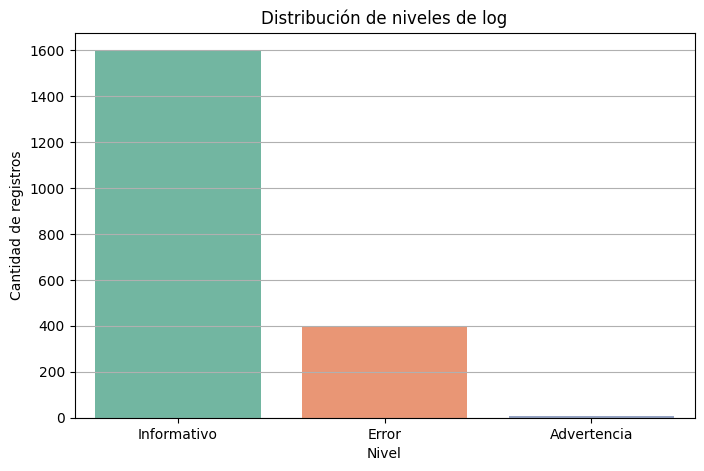

In [40]:
# Distribución por nivel
plt.figure(figsize=(8,5))
sns.countplot(data=logDF, x='Level', order=logDF['Level'].value_counts().index, palette="Set2")
plt.title("Distribución de niveles de log")
plt.xlabel("Nivel")
plt.ylabel("Cantidad de registros")
plt.grid(axis='y')
plt.show()

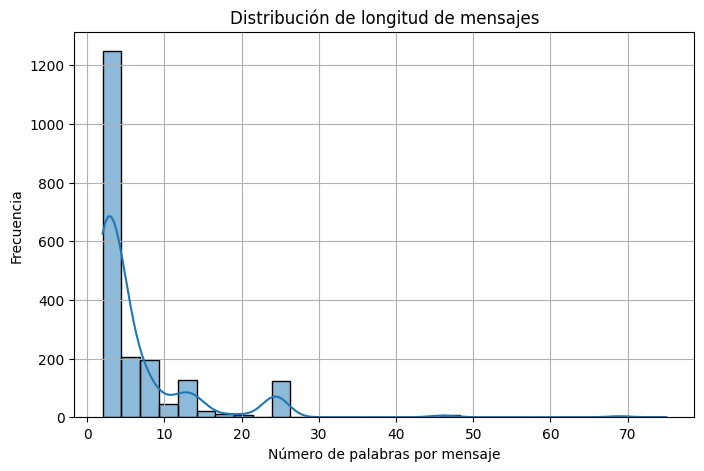

In [41]:
# Longitud de mensajes
plt.figure(figsize=(8,5))
sns.histplot(logDF['content_length'], bins=30, kde=True)
plt.title("Distribución de longitud de mensajes")
plt.xlabel("Número de palabras por mensaje")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

In [42]:
logDF.to_csv(f"{dir_path}{dataset}_2k.log_structured_to_process.csv", index=False)